# Baseline Logistic Regression: Comparing Raw, SMOTE, and ADASYN Models

This notebook compares three logistic regression models trained on:
1. **Raw/Original** dataset (imbalanced)
2. **SMOTE Balanced** dataset (synthetic oversampling)
3. **ADASYN Balanced** dataset (adaptive synthetic oversampling)

**Prerequisites:** Run notebook 01 (data exploration) first to generate the processed data files.


## Load Processed Data from Notebook 01

The following cell loads the pre-processed and scaled dataframe from notebook 01. This ensures we're working with the same processed data without re-running all data cleaning and feature engineering steps.


In [6]:
# ============================================================
# Load Processed Data from Notebook 01
# ============================================================

import pickle
import pandas as pd
import numpy as np
import os

# Check if processed data exists
data_dir = "../data/processed"
pkl_path = f"{data_dir}/df_scaled.pkl"

if os.path.exists(pkl_path):
    # Load the processed dataframe
    with open(pkl_path, "rb") as f:
        df_scaled = pickle.load(f)
    
    # Load the scaler (if needed for future transformations)
    scaler_path = f"{data_dir}/scaler.pkl"
    if os.path.exists(scaler_path):
        with open(scaler_path, "rb") as f:
            scaler = pickle.load(f)
    
    print("=" * 70)
    print("PROCESSED DATA LOADED SUCCESSFULLY")
    print("=" * 70)
    print(f" Loaded from: {pkl_path}")
    print(f" DataFrame shape: {df_scaled.shape}")
    print(f" Columns: {df_scaled.shape[1]}")
    print(f" Rows: {df_scaled.shape[0]}")
    print(f"\nFirst few columns: {list(df_scaled.columns[:10])}")
    print(f"\nAttrition distribution:")
    print(df_scaled["Attrition"].value_counts())
    print(f"\n Data ready for modeling!")
    print("=" * 70)
    
else:
    raise FileNotFoundError(
        f"\n{'='*70}\n"
        f"PROCESSED DATA NOT FOUND\n"
        f"{'='*70}\n"
        f"File not found: {pkl_path}\n\n"
        f"Please run notebook 01 (01-data-exploration.ipynb) first:\n"
        f"1. Execute all cells in notebook 01\n"
        f"2. This will save the processed data to {data_dir}/\n"
        f"3. Then return to this notebook\n"
        f"{'='*70}"
    )


PROCESSED DATA LOADED SUCCESSFULLY
 Loaded from: ../data/processed/df_scaled.pkl
 DataFrame shape: (1470, 29)
 Columns: 29
 Rows: 1470

First few columns: ['Attrition', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobSatisfaction', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike']

Attrition distribution:
Attrition
0    1233
1     237
Name: count, dtype: int64

 Data ready for modeling!


In [7]:
# ============================================================
# Step 1: Prepare Three Response Variable Sets
# ============================================================

from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# ---------------------------------------
# 1.1: Initial Train-Test Split (Same for All Three Sets)
# ---------------------------------------
X = df_scaled.drop(columns=["Attrition"])
y = df_scaled["Attrition"]

# Split once - we'll use same test set for all models
X_train_base, X_test, y_train_base, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

print("=" * 70)
print("PREPARING THREE RESPONSE VARIABLE SETS")
print("=" * 70)

# Display original class distribution
print("\n--- ORIGINAL TRAINING SET DISTRIBUTION ---")
print(f"Class 0 (No Attrition):  {(y_train_base == 0).sum()} ({(y_train_base == 0).mean()*100:.1f}%)")
print(f"Class 1 (Attrition):      {(y_train_base == 1).sum()} ({(y_train_base == 1).mean()*100:.1f}%)")
print(f"Imbalance Ratio:          {(y_train_base == 0).sum() / (y_train_base == 1).sum():.2f}:1")

# ---------------------------------------
# 1.2: Set 1 - Raw/Original (No Balancing)
# ---------------------------------------
X_train_raw = X_train_base.copy()
y_train_raw = y_train_base.copy()

print("\n--- SET 1: RAW/ORIGINAL (No Balancing) ---")
print(f"Class 0: {(y_train_raw == 0).sum()} | Class 1: {(y_train_raw == 1).sum()}")
print(f"Ratio: {(y_train_raw == 0).sum() / (y_train_raw == 1).sum():.2f}:1")

# ---------------------------------------
# 1.3: Set 2 - SMOTE Balanced
# ---------------------------------------
print("\n--- SET 2: SMOTE BALANCED ---")
smote = SMOTE(
    random_state=42,
    k_neighbors=5,
    sampling_strategy='auto'  # Balances to 50:50
)

X_train_smote, y_train_smote = smote.fit_resample(X_train_base, y_train_base)

print(f"Class 0: {(y_train_smote == 0).sum()} | Class 1: {(y_train_smote == 1).sum()}")
print(f"Ratio: {(y_train_smote == 0).sum() / (y_train_smote == 1).sum():.2f}:1")
print(f"SMOTE generated {(y_train_smote == 1).sum() - (y_train_base == 1).sum()} synthetic samples")

# ---------------------------------------
# 1.4: Set 3 - ADASYN Balanced
# ---------------------------------------
print("\n--- SET 3: ADASYN BALANCED ---")
adasyn = ADASYN(
    random_state=42,
    n_neighbors=5,
    sampling_strategy='auto'
)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_base, y_train_base)

print(f"Class 0: {(y_train_adasyn == 0).sum()} | Class 1: {(y_train_adasyn == 1).sum()}")
print(f"Ratio: {(y_train_adasyn == 0).sum() / (y_train_adasyn == 1).sum():.2f}:1")
print(f"ADASYN generated {(y_train_adasyn == 1).sum() - (y_train_base == 1).sum()} synthetic samples")

# ---------------------------------------
# 1.5: Store All Three Sets in Dictionary for Easy Access
# ---------------------------------------
training_sets = {
    'raw': {
        'X_train': X_train_raw,
        'y_train': y_train_raw,
        'name': 'Raw/Original',
        'description': 'Original imbalanced dataset (no resampling)'
    },
    'smote': {
        'X_train': X_train_smote,
        'y_train': y_train_smote,
        'name': 'SMOTE Balanced',
        'description': 'Synthetic Minority Oversampling Technique - uniform synthetic generation'
    },
    'adasyn': {
        'X_train': X_train_adasyn,
        'y_train': y_train_adasyn,
        'name': 'ADASYN Balanced',
        'description': 'Adaptive Synthetic Sampling - focuses on harder-to-learn minority samples'
    }
}

print("\n" + "=" * 70)
print("THREE RESPONSE VARIABLE SETS PREPARED SUCCESSFULLY")
print("=" * 70)
print("\nAll sets use the same test set for fair comparison:")
print(f"Test set - Class 0: {(y_test == 0).sum()} | Class 1: {(y_test == 1).sum()}")

PREPARING THREE RESPONSE VARIABLE SETS

--- ORIGINAL TRAINING SET DISTRIBUTION ---
Class 0 (No Attrition):  863 (83.9%)
Class 1 (Attrition):      166 (16.1%)
Imbalance Ratio:          5.20:1

--- SET 1: RAW/ORIGINAL (No Balancing) ---
Class 0: 863 | Class 1: 166
Ratio: 5.20:1

--- SET 2: SMOTE BALANCED ---
Class 0: 863 | Class 1: 863
Ratio: 1.00:1
SMOTE generated 697 synthetic samples

--- SET 3: ADASYN BALANCED ---
Class 0: 863 | Class 1: 851
Ratio: 1.01:1
ADASYN generated 685 synthetic samples

THREE RESPONSE VARIABLE SETS PREPARED SUCCESSFULLY

All sets use the same test set for fair comparison:
Test set - Class 0: 370 | Class 1: 71


/Users/satkarkarki/Desktop/portfolio/hr-attrition/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/Users/satkarkarki/Desktop/portfolio/hr-attrition/.venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


## Step 2: Helper Functions for Model Training and Evaluation

We'll create reusable functions to train logistic regression models and evaluate their performance across all three datasets.


In [8]:
# ============================================================
# Step 2: Helper Functions to Train and Compare Models
# ============================================================

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

def train_and_evaluate_model(X_train, y_train, X_test, y_test, 
                             model_name="Model", random_state=42):
    """
    Train a logistic regression model and return comprehensive metrics.
    
    Parameters:
    -----------
    X_train : DataFrame/array
        Training features
    y_train : Series/array
        Training labels
    X_test : DataFrame/array
        Test features
    y_test : Series/array
        Test labels
    model_name : str
        Name of the model for reporting
    random_state : int
        Random state for reproducibility
        
    Returns:
    --------
    dict : Dictionary containing all metrics and predictions
    """
    
    # Train model
    model = LogisticRegression(
        max_iter=2000,
        solver="liblinear",
        class_weight=None,
        random_state=random_state
    )
    
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    metrics = {
        'model_name': model_name,
        'model': model,
        
        # Training metrics
        'train_accuracy': accuracy_score(y_train, y_train_pred),
        'train_precision': precision_score(y_train, y_train_pred),
        'train_recall': recall_score(y_train, y_train_pred),
        'train_f1': f1_score(y_train, y_train_pred),
        
        # Test metrics
        'test_accuracy': accuracy_score(y_test, y_test_pred),
        'test_precision': precision_score(y_test, y_test_pred),
        'test_recall': recall_score(y_test, y_test_pred),
        'test_f1': f1_score(y_test, y_test_pred),
        'test_auc': roc_auc_score(y_test, y_test_prob),
        
        # Predictions for further analysis
        'y_test_pred': y_test_pred,
        'y_test_prob': y_test_prob,
        
        # Confusion matrix
        'confusion_matrix': confusion_matrix(y_test, y_test_pred),
        
        # Classification report
        'classification_report': classification_report(
            y_test, y_test_pred, 
            target_names=['No Attrition', 'Attrition'],
            output_dict=True
        )
    }
    
    return metrics


def compare_models(training_sets, X_test, y_test):
    """
    Train models on all three response variable sets and compare performance.
    
    Parameters:
    -----------
    training_sets : dict
        Dictionary containing the three training sets (raw, smote, adasyn)
    X_test : DataFrame/array
        Test features
    y_test : Series/array
        Test labels
        
    Returns:
    --------
    dict : Dictionary containing all model results and comparison DataFrame
    """
    
    print("=" * 70)
    print("TRAINING MODELS ON THREE RESPONSE VARIABLE SETS")
    print("=" * 70)
    
    results = {}
    
    # Train model on each set
    for key, data in training_sets.items():
        print(f"\nTraining model on: {data['name']}...")
        print(f"Description: {data['description']}")
        
        results[key] = train_and_evaluate_model(
            X_train=data['X_train'],
            y_train=data['y_train'],
            X_test=X_test,
            y_test=y_test,
            model_name=data['name']
        )
        
        print(f" Model trained - Test Recall: {results[key]['test_recall']:.4f}")
    
    # Create comparison DataFrame
    comparison_data = []
    for key, result in results.items():
        comparison_data.append({
            'Model': training_sets[key]['name'],
            'Train_Accuracy': result['train_accuracy'],
            'Train_Precision': result['train_precision'],
            'Train_Recall': result['train_recall'],
            'Train_F1': result['train_f1'],
            'Test_Accuracy': result['test_accuracy'],
            'Test_Precision': result['test_precision'],
            'Test_Recall': result['test_recall'],
            'Test_F1': result['test_f1'],
            'Test_AUC': result['test_auc']
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    
    # Calculate improvements relative to baseline (raw)
    baseline_metrics = ['Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'Test_AUC']
    for metric in baseline_metrics:
        baseline_value = comparison_df.loc[comparison_df['Model'] == 'Raw/Original', metric].values[0]
        comparison_df[f'{metric}_Improvement'] = (
            (comparison_df[metric] - baseline_value) / baseline_value * 100
        )
    
    results['comparison_df'] = comparison_df
    
    return results


# ============================================================
# Step 3: Train Models and Compare Performance
# ============================================================

model_results = compare_models(training_sets, X_test, y_test)

# Display comparison table
print("\n" + "=" * 70)
print("MODEL PERFORMANCE COMPARISON")
print("=" * 70)
print("\n--- TEST SET METRICS ---")
display_cols = ['Model', 'Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'Test_AUC']
print(model_results['comparison_df'][display_cols].to_string(index=False))

print("\n--- IMPROVEMENTS RELATIVE TO BASELINE (Raw/Original) ---")
improvement_cols = ['Model', 'Test_Recall_Improvement', 'Test_F1_Improvement', 
                    'Test_Precision_Improvement', 'Test_AUC_Improvement']
print(model_results['comparison_df'][improvement_cols].to_string(index=False))


TRAINING MODELS ON THREE RESPONSE VARIABLE SETS

Training model on: Raw/Original...
Description: Original imbalanced dataset (no resampling)
 Model trained - Test Recall: 0.4366

Training model on: SMOTE Balanced...
Description: Synthetic Minority Oversampling Technique - uniform synthetic generation
 Model trained - Test Recall: 0.5915

Training model on: ADASYN Balanced...
Description: Adaptive Synthetic Sampling - focuses on harder-to-learn minority samples
 Model trained - Test Recall: 0.5915

MODEL PERFORMANCE COMPARISON

--- TEST SET METRICS ---
          Model  Test_Accuracy  Test_Precision  Test_Recall  Test_F1  Test_AUC
   Raw/Original       0.893424        0.815789     0.436620 0.568807  0.816521
 SMOTE Balanced       0.807256        0.428571     0.591549 0.497041  0.797716
ADASYN Balanced       0.814059        0.442105     0.591549 0.506024  0.800190

--- IMPROVEMENTS RELATIVE TO BASELINE (Raw/Original) ---
          Model  Test_Recall_Improvement  Test_F1_Improvement  Test_

## Step 4: Visualize Model Comparison

Create comprehensive visualizations comparing all three models including confusion matrices, performance metrics, and improvement charts.


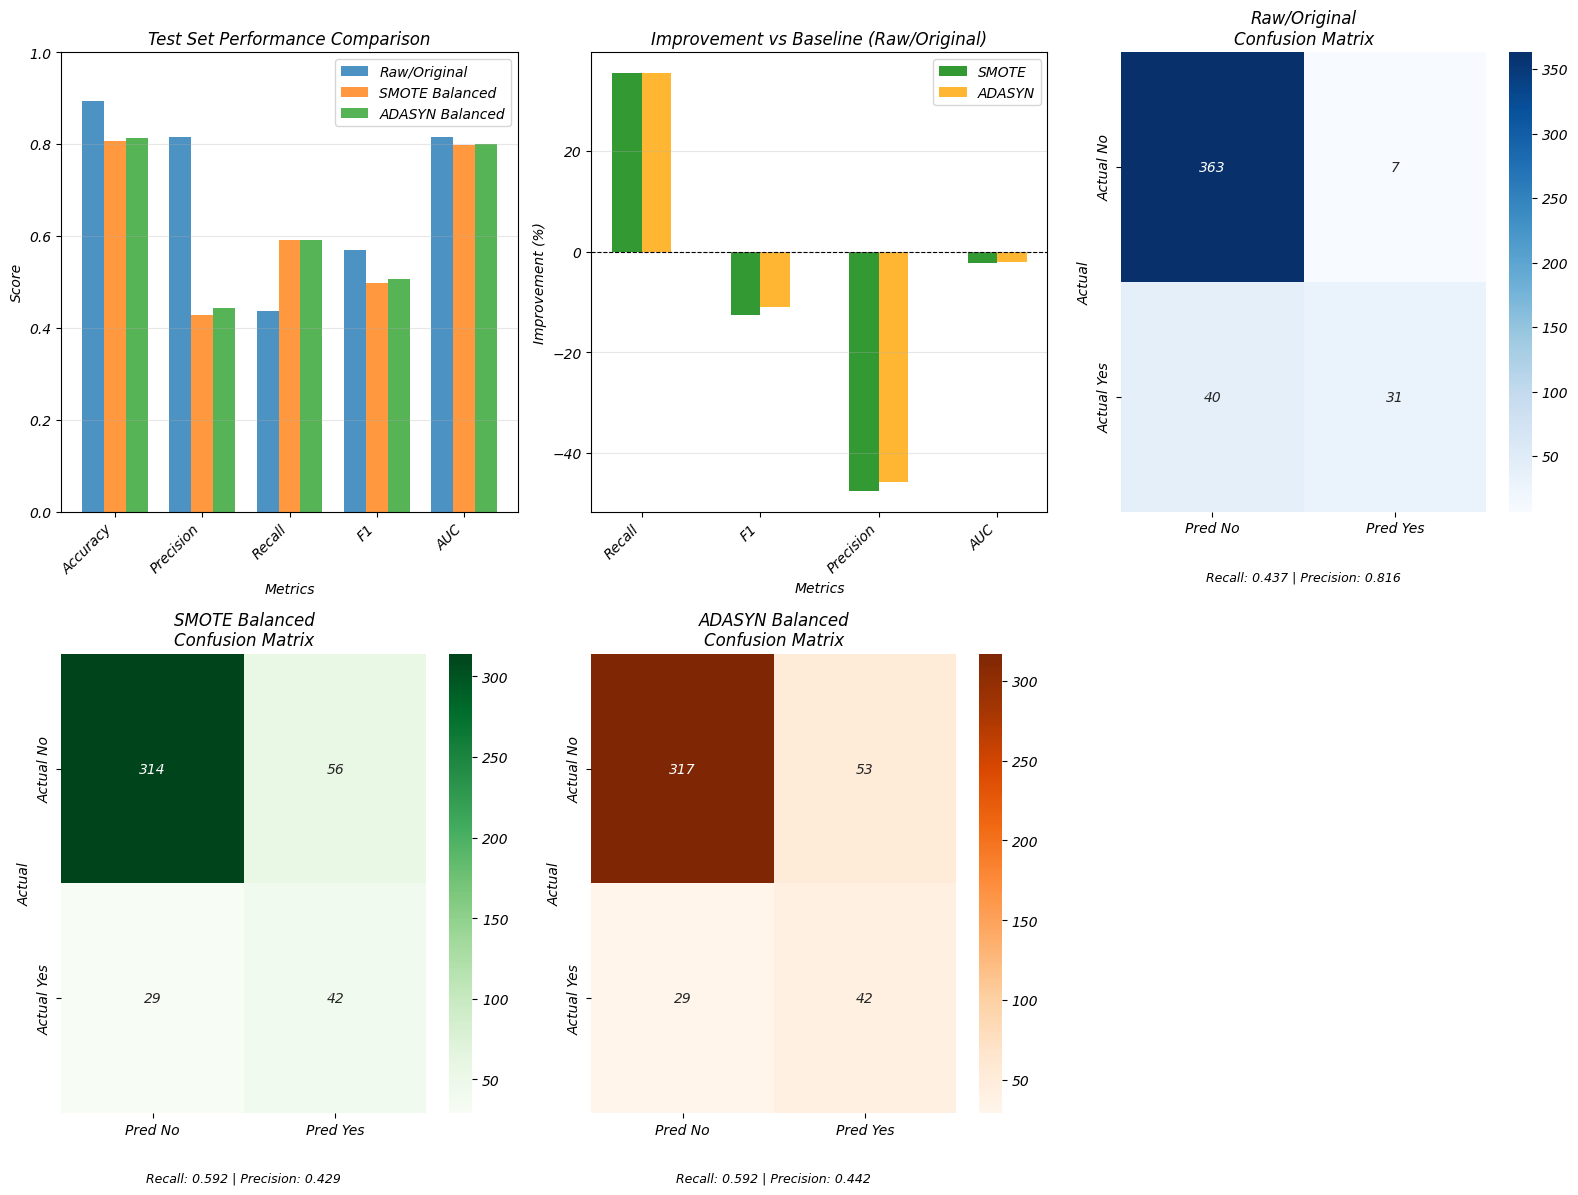


DETAILED METRICS BREAKDOWN

--- Raw/Original ---
Test Accuracy:  0.8934
Test Precision: 0.8158
Test Recall:    0.4366
Test F1:        0.5688
Test AUC:       0.8165

Confusion Matrix:
[[363   7]
 [ 40  31]]

Classification Report:
              precision    recall  f1-score   support

No Attrition       0.90      0.98      0.94       370
   Attrition       0.82      0.44      0.57        71

    accuracy                           0.89       441
   macro avg       0.86      0.71      0.75       441
weighted avg       0.89      0.89      0.88       441


--- SMOTE Balanced ---
Test Accuracy:  0.8073
Test Precision: 0.4286
Test Recall:    0.5915
Test F1:        0.4970
Test AUC:       0.7977

Confusion Matrix:
[[314  56]
 [ 29  42]]

Classification Report:
              precision    recall  f1-score   support

No Attrition       0.92      0.85      0.88       370
   Attrition       0.43      0.59      0.50        71

    accuracy                           0.81       441
   macro avg       

In [9]:
# ============================================================
# Step 4: Visualize Comparison Results
# ============================================================

def visualize_model_comparison(model_results, training_sets):
    """
    Create comprehensive visualizations comparing all three models.
    """
    
    comparison_df = model_results['comparison_df']
    
    # Create figure with subplots
    fig = plt.figure(figsize=(16, 12))
    
    # 1. Metrics Comparison Bar Chart
    ax1 = plt.subplot(2, 3, 1)
    metrics = ['Test_Accuracy', 'Test_Precision', 'Test_Recall', 'Test_F1', 'Test_AUC']
    x = np.arange(len(metrics))
    width = 0.25
    
    for i, (key, data) in enumerate(training_sets.items()):
        model_name = data['name']
        values = [comparison_df.loc[comparison_df['Model'] == model_name, m].values[0] 
                 for m in metrics]
        ax1.bar(x + i*width, values, width, label=model_name, alpha=0.8)
    
    ax1.set_xlabel('Metrics')
    ax1.set_ylabel('Score')
    ax1.set_title('Test Set Performance Comparison')
    ax1.set_xticks(x + width)
    ax1.set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1', 'AUC'], rotation=45, ha='right')
    ax1.legend()
    ax1.grid(axis='y', alpha=0.3)
    ax1.set_ylim([0, 1])
    
    # 2. Improvement Relative to Baseline
    ax2 = plt.subplot(2, 3, 2)
    improvement_metrics = ['Test_Recall_Improvement', 'Test_F1_Improvement', 
                          'Test_Precision_Improvement', 'Test_AUC_Improvement']
    x_imp = np.arange(len(improvement_metrics))
    
    smote_improvements = [comparison_df.loc[comparison_df['Model'] == 'SMOTE Balanced', m].values[0] 
                          for m in improvement_metrics]
    adasyn_improvements = [comparison_df.loc[comparison_df['Model'] == 'ADASYN Balanced', m].values[0] 
                           for m in improvement_metrics]
    
    ax2.bar(x_imp - width/2, smote_improvements, width, label='SMOTE', alpha=0.8, color='green')
    ax2.bar(x_imp + width/2, adasyn_improvements, width, label='ADASYN', alpha=0.8, color='orange')
    
    ax2.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
    ax2.set_xlabel('Metrics')
    ax2.set_ylabel('Improvement (%)')
    ax2.set_title('Improvement vs Baseline (Raw/Original)')
    ax2.set_xticks(x_imp)
    ax2.set_xticklabels(['Recall', 'F1', 'Precision', 'AUC'], rotation=45, ha='right')
    ax2.legend()
    ax2.grid(axis='y', alpha=0.3)
    
    # 3-5. Confusion Matrices
    cm_titles = ['Raw/Original', 'SMOTE Balanced', 'ADASYN Balanced']
    cm_keys = ['raw', 'smote', 'adasyn']
    cm_colors = ['Blues', 'Greens', 'Oranges']
    
    for idx, (key, title, color) in enumerate(zip(cm_keys, cm_titles, cm_colors)):
        ax = plt.subplot(2, 3, 3 + idx)
        cm = model_results[key]['confusion_matrix']
        sns.heatmap(cm, annot=True, fmt='d', cmap=color, ax=ax,
                   xticklabels=['Pred No', 'Pred Yes'],
                   yticklabels=['Actual No', 'Actual Yes'])
        ax.set_title(f'{title}\nConfusion Matrix')
        ax.set_ylabel('Actual')
        
        # Add key metrics as text
        tn, fp, fn, tp = cm.ravel()
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        ax.text(0.5, -0.15, f'Recall: {recall:.3f} | Precision: {precision:.3f}',
               transform=ax.transAxes, ha='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # 6. Detailed Metrics Table
    print("\n" + "=" * 70)
    print("DETAILED METRICS BREAKDOWN")
    print("=" * 70)
    
    for key, data in training_sets.items():
        result = model_results[key]
        print(f"\n--- {data['name']} ---")
        print(f"Test Accuracy:  {result['test_accuracy']:.4f}")
        print(f"Test Precision: {result['test_precision']:.4f}")
        print(f"Test Recall:    {result['test_recall']:.4f}")
        print(f"Test F1:        {result['test_f1']:.4f}")
        print(f"Test AUC:       {result['test_auc']:.4f}")
        print(f"\nConfusion Matrix:")
        print(result['confusion_matrix'])
        print(f"\nClassification Report:")
        print(classification_report(y_test, result['y_test_pred'],
                                   target_names=['No Attrition', 'Attrition']))


# Execute visualization
visualize_model_comparison(model_results, training_sets)


## Step 5: Detailed Analysis of Best Model (Based on Recall)

Since recall is critical for HR attrition prediction (we want to catch as many employees who will leave as possible), we'll provide detailed analysis of the model with highest recall.


In [10]:
# ============================================================
# Step 5: Detailed Analysis of Best Model (Highest Recall)
# ============================================================

# Find best model based on recall
comparison_df = model_results['comparison_df']
best_recall_idx = comparison_df['Test_Recall'].idxmax()
best_model_name = comparison_df.loc[best_recall_idx, 'Model']
best_model_key = [k for k, v in training_sets.items() if v['name'] == best_model_name][0]

print("=" * 70)
print(f"DETAILED ANALYSIS: {best_model_name.upper()}")
print("=" * 70)
print(f"\nThis model has the highest recall: {comparison_df.loc[best_recall_idx, 'Test_Recall']:.4f}")
print(f"\nWhy Recall Matters for HR Attrition:")
print("   Missing an employee who will leave (False Negative) is costly")
print("   Better to catch more at-risk employees even if some false alarms")
print("   Retention interventions are cheaper than losing employees")

# Get detailed metrics
best_result = model_results[best_model_key]
print(f"\n{'='*70}")
print("PERFORMANCE METRICS")
print("=" * 70)
print(f"\nTest Set Performance:")
print(f"   Accuracy:  {best_result['test_accuracy']:.4f}")
print(f"   Precision: {best_result['test_precision']:.4f}")
print(f"   Recall:    {best_result['test_recall']:.4f}")
print(f"   F1 Score:  {best_result['test_f1']:.4f}")
print(f"   AUC-ROC:   {best_result['test_auc']:.4f}")

print(f"\n{'='*70}")
print("CONFUSION MATRIX")
print("=" * 70)
cm = best_result['confusion_matrix']
print(f"\n{cm}")
print(f"\n  True Negatives (TN):  {cm[0,0]} - Correctly predicted 'No Attrition'")
print(f"  False Positives (FP): {cm[0,1]} - Predicted 'Attrition' but actually 'No'")
print(f"  False Negatives (FN): {cm[1,0]} - Predicted 'No Attrition' but actually 'Yes'")
print(f"  True Positives (TP):  {cm[1,1]} - Correctly predicted 'Attrition'")

print(f"\n{'='*70}")
print("CLASSIFICATION REPORT")
print("=" * 70)
print(classification_report(y_test, best_result['y_test_pred'],
                           target_names=['No Attrition', 'Attrition']))

print(f"\n{'='*70}")
print("BUSINESS INTERPRETATION")
print("=" * 70)
tn, fp, fn, tp = cm.ravel()
print(f"\nOut of {len(y_test)} test employees:")
print(f"   {tp} employees correctly identified as leaving (True Positives)")
print(f"   {fn} employees who left were missed (False Negatives)")
print(f"   {fp} employees incorrectly flagged as leaving (False Positives)")
print(f"   {tn} employees correctly identified as staying (True Negatives)")
print(f"\nRecall of {best_result['test_recall']:.1%} means we catch {best_result['test_recall']:.1%} of all employees who will actually leave.")
print(f"\nThis is critical because each missed employee (FN) represents a costly loss.")


DETAILED ANALYSIS: SMOTE BALANCED

This model has the highest recall: 0.5915

Why Recall Matters for HR Attrition:
  • Missing an employee who will leave (False Negative) is costly
  • Better to catch more at-risk employees even if some false alarms
  • Retention interventions are cheaper than losing employees

PERFORMANCE METRICS

Test Set Performance:
  • Accuracy:  0.8073
  • Precision: 0.4286
  • Recall:    0.5915
  • F1 Score:  0.4970
  • AUC-ROC:   0.7977

CONFUSION MATRIX

[[314  56]
 [ 29  42]]

  True Negatives (TN):  314 - Correctly predicted 'No Attrition'
  False Positives (FP): 56 - Predicted 'Attrition' but actually 'No'
  False Negatives (FN): 29 - Predicted 'No Attrition' but actually 'Yes'
  True Positives (TP):  42 - Correctly predicted 'Attrition'

CLASSIFICATION REPORT
              precision    recall  f1-score   support

No Attrition       0.92      0.85      0.88       370
   Attrition       0.43      0.59      0.50        71

    accuracy                        

## Step 6: Summary and Recommendations

Generate data-driven recommendations based on model comparison.


In [11]:
# ============================================================
# Step 6: Summary and Recommendations
# ============================================================

def generate_recommendations(model_results, training_sets):
    """
    Generate data-driven recommendations based on model comparison.
    """
    
    comparison_df = model_results['comparison_df']
    
    print("=" * 70)
    print("DATA-DRIVEN RECOMMENDATIONS")
    print("=" * 70)
    
    # Find best model for each metric
    best_recall = comparison_df.loc[comparison_df['Test_Recall'].idxmax(), 'Model']
    best_f1 = comparison_df.loc[comparison_df['Test_F1'].idxmax(), 'Model']
    best_precision = comparison_df.loc[comparison_df['Test_Precision'].idxmax(), 'Model']
    best_auc = comparison_df.loc[comparison_df['Test_AUC'].idxmax(), 'Model']
    
    print(f"\n BEST MODELS BY METRIC:")
    print(f"    Highest Recall:    {best_recall} ({comparison_df['Test_Recall'].max():.4f})")
    print(f"    Highest F1 Score:  {best_f1} ({comparison_df['Test_F1'].max():.4f})")
    print(f"    Highest Precision: {best_precision} ({comparison_df['Test_Precision'].max():.4f})")
    print(f"    Highest AUC:       {best_auc} ({comparison_df['Test_AUC'].max():.4f})")
    
    # Recall improvement analysis
    smote_recall_imp = comparison_df.loc[comparison_df['Model'] == 'SMOTE Balanced', 
                                        'Test_Recall_Improvement'].values[0]
    adasyn_recall_imp = comparison_df.loc[comparison_df['Model'] == 'ADASYN Balanced',
                                         'Test_Recall_Improvement'].values[0]
    
    print(f"\n RECALL IMPROVEMENT (Critical for HR Attrition):")
    print(f"    SMOTE:  {smote_recall_imp:+.1f}% improvement")
    print(f"    ADASYN: {adasyn_recall_imp:+.1f}% improvement")
    
    # Business recommendation
    print(f"\n BUSINESS RECOMMENDATION:")
    if smote_recall_imp > 10 or adasyn_recall_imp > 10:
        best_model = 'SMOTE Balanced' if smote_recall_imp > adasyn_recall_imp else 'ADASYN Balanced'
        print(f"    Use {best_model} model for production")
        print(f"    Significant recall improvement means catching more employees at risk")
        print(f"    Trade-off: Slight precision decrease is acceptable given cost of false negatives")
    else:
        print(f"    Consider baseline model if precision is critical")
        print(f"    Or use class_weight='balanced' as alternative to resampling")
    
    # Cost-benefit analysis
    baseline_recall = comparison_df.loc[comparison_df['Model'] == 'Raw/Original', 'Test_Recall'].values[0]
    best_recall_value = comparison_df['Test_Recall'].max()
    
    print(f"\n COST-BENEFIT ANALYSIS:")
    print(f"    Baseline catches {baseline_recall*100:.1f}% of employees who will leave")
    print(f"    Best model catches {best_recall_value*100:.1f}% of employees who will leave")
    print(f"    Improvement: {(best_recall_value - baseline_recall)*100:.1f} percentage points")
    print(f"    This means catching {(best_recall_value - baseline_recall)*100:.1f} more at-risk employees per 100")


# Generate recommendations
generate_recommendations(model_results, training_sets)


DATA-DRIVEN RECOMMENDATIONS

 BEST MODELS BY METRIC:
   • Highest Recall:    SMOTE Balanced (0.5915)
   • Highest F1 Score:  Raw/Original (0.5688)
   • Highest Precision: Raw/Original (0.8158)
   • Highest AUC:       Raw/Original (0.8165)

 RECALL IMPROVEMENT (Critical for HR Attrition):
   • SMOTE:  +35.5% improvement
   • ADASYN: +35.5% improvement

 BUSINESS RECOMMENDATION:
    Use ADASYN Balanced model for production
    Significant recall improvement means catching more employees at risk
    Trade-off: Slight precision decrease is acceptable given cost of false negatives

 COST-BENEFIT ANALYSIS:
   • Baseline catches 43.7% of employees who will leave
   • Best model catches 59.2% of employees who will leave
   • Improvement: 15.5 percentage points
   • This means catching 15.5 more at-risk employees per 100
